In [ ]:
import numpy as np      
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Pandas/Data_Sets/500_Person_Gender_Height_Weight_Index.csv")
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
# Gives the summation of null values 
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
def bmi(x): 
  z=x["Weight"]/x["Height"]/x["Height"]*10000 
  return int(z) 
data["BMI_value"]=data.apply(bmi,axis=1) 
data.head() 

,Gender,Height,Weight,Index,BMI_value
0,Male,174,96,4,31
1,Male,189,87,2,24
2,Female,185,110,4,32
3,Female,195,104,3,27
4,Male,149,61,3,27


In [ ]:
def STATUS(x):
  if 0 < x['BMI_value'] < 16:
    return 'Severe_Underweight'
  elif 16 <= x['BMI_value'] < 18.5:
    return 'Underweight'
  elif 18.5 < x['BMI_value'] < 25:
    return 'Normal'
  elif 25 <= x['BMI_value'] < 30:
    return 'Overweight'
  elif 30<= x['BMI_value'] < 35: 
    return "Obess Class 1"
  elif 35 <= x['BMI_value'] < 40:
    return "Obess Class 2"
  else:
    return "Obess Class 3"

In [ ]:
data['Status'] = data.apply(STATUS,axis=1)
data

,Gender,Height,Weight,Index,BMI_value,Status
0,Male,174,96,4,31,Obess Class 1
1,Male,189,87,2,24,Normal
2,Female,185,110,4,32,Obess Class 1
3,Female,195,104,3,27,Overweight
4,Male,149,61,3,27,Overweight
...,...,...,...,...,...,...
495,Female,150,153,5,68,Obess Class 3
496,Female,184,121,4,35,Obess Class 2
497,Female,141,136,5,68,Obess Class 3
498,Male,150,95,5,42,Obess Class 3


In [ ]:
def sts_val(h):
  if h["Status"] == 'Obess Class 3':
    return 7
  elif h["Status"] == 'Obess Class 2':
    return 6
  elif h["Status"] == 'Obess Class 1':
    return 5
  elif h["Status"] == 'Severe_Underweight':
    return 4
  elif h["Status"] == 'Underweight':
    return 3
  elif h["Status"] == 'Normal':
    return 2
  else:
    return 1

In [ ]:
data["Sts_Val"] = data.apply(sts_val,axis = 1)
data

,Gender,Height,Weight,BMI_value,Status,Sts_Val
0,Male,174,96,31,Obess Class 1,5
1,Male,189,87,24,Normal,2
2,Female,185,110,32,Obess Class 1,5
3,Female,195,104,27,Overweight,1
4,Male,149,61,27,Overweight,1
...,...,...,...,...,...,...
495,Female,150,153,68,Obess Class 3,7
496,Female,184,121,35,Obess Class 2,6
497,Female,141,136,68,Obess Class 3,7
498,Male,150,95,42,Obess Class 3,7


In [ ]:
#      <<<   BMI Report generation  >>> 

In [ ]:
data["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [ ]:
data["Status"].value_counts()

Obess Class 3         202
Overweight             68
Obess Class 1          65
Obess Class 2          65
Normal                 62
Underweight            26
Severe_Underweight     12
Name: Status, dtype: int64

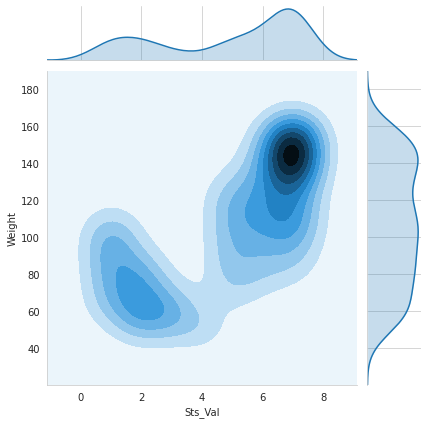

In [57]:
sns.jointplot(x ='Sts_Val', y="Weight", data = data, kind = "kde")

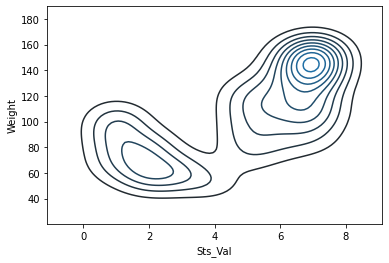

In [ ]:
sns.kdeplot(data = data['Sts_Val'],data2 = data["Weight"])

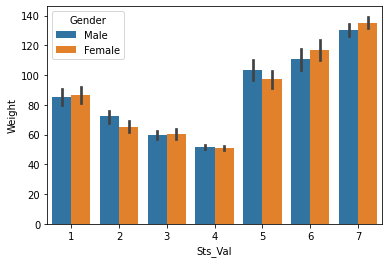

In [ ]:
sns.barplot(x = 'Sts_Val', y = 'Weight',data = data, hue = "Gender")

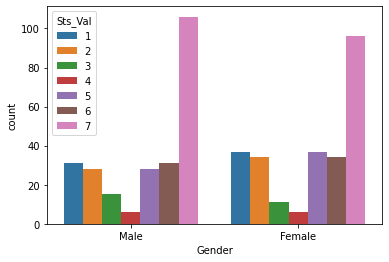

In [ ]:
sns.countplot(x = 'Gender' ,data=data, hue='Sts_Val')

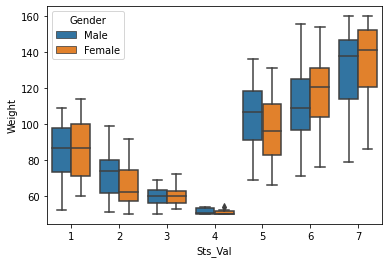

In [ ]:
sns.boxplot(x = 'Sts_Val',y = 'Weight',data = data, hue = 'Gender')

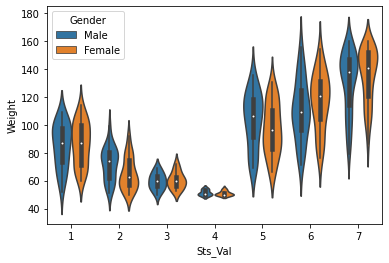

In [ ]:
sns.violinplot( x = 'Sts_Val', y = 'Weight',data = data, hue = 'Gender')

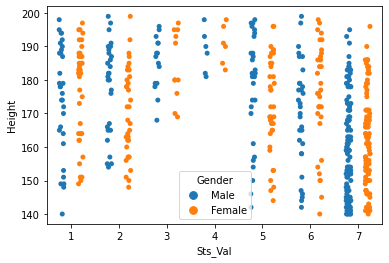

In [ ]:
sns.stripplot(x = 'Sts_Val',y = 'Height', data  = data , hue = 'Gender',dodge = True)

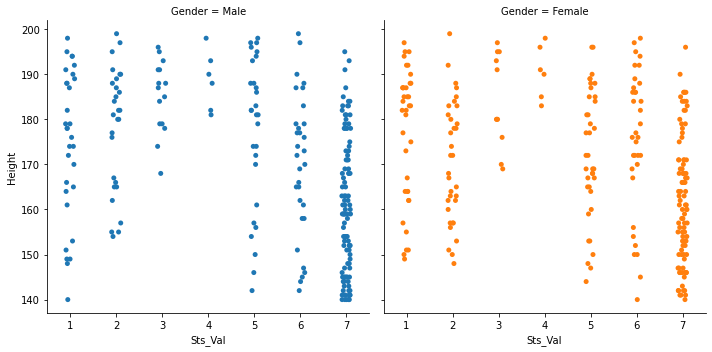

In [ ]:
sns.catplot(x = 'Sts_Val', y = 'Height',data = data,hue = 'Gender', col = 'Gender')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


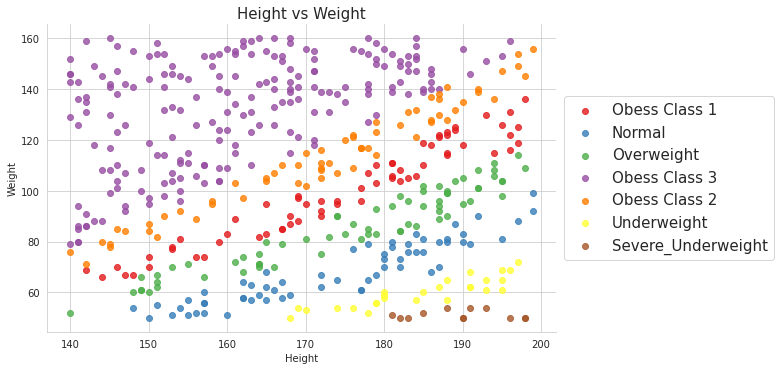

In [61]:
sns.set_style('whitegrid')
sns.lmplot(x='Height', y='Weight', data=data, hue='Status', fit_reg=False, legend=False, palette='Set1', size=5, aspect=3) #size = 5 spread of the data poits, aspect = 2 width of the each grid 
ax1 = plt.gca() # it reduces the total image of the plot
ax1.set_title('Height vs Weight', size=15) 
box = ax1.get_position()# it just expands the image of the plot image 
ax1.set_position([box.x0, box.y0, box.width * 0.5, box.height]) #0.5 shows the uniform grid size 
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15}) # to print the "hue labels" 

In [63]:
people_count = data['Gender'].value_counts()
people_count

Female    255
Male      245
Name: Gender, dtype: int64

In [64]:
status_count = data["Status"].value_counts()
status_count

Obess Class 3         202
Overweight             68
Obess Class 1          65
Obess Class 2          65
Normal                 62
Underweight            26
Severe_Underweight     12
Name: Status, dtype: int64

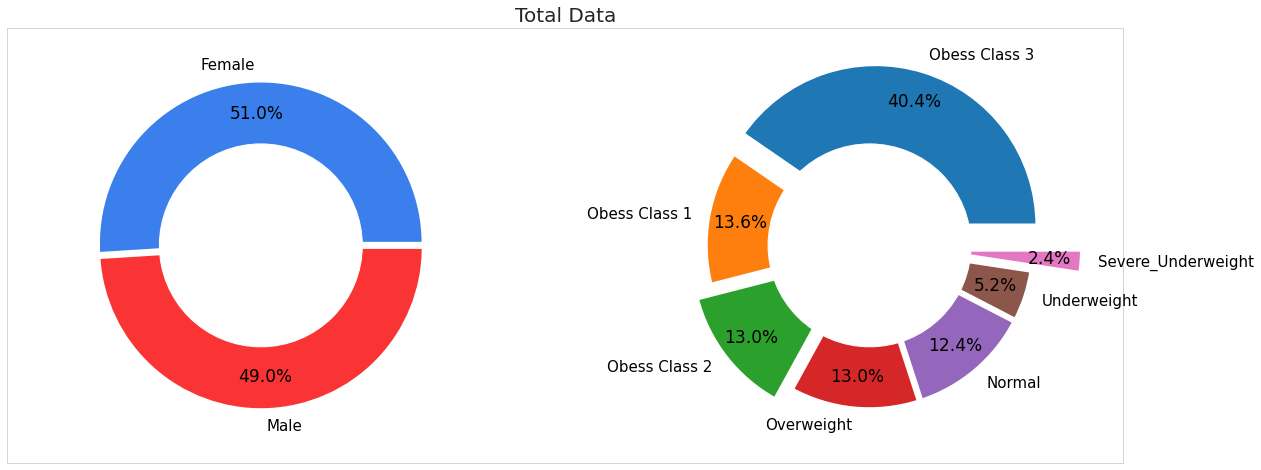

In [73]:
#Total Data taken Male Vs 
fig = plt.figure(figsize=(20, 8))
plt.title("Total Data", loc="center", weight=10, size=20)
plt.xticks([])
plt.yticks([])

# first pie plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people_count))
wedges, texts, autotexts = ax1.pie( people_count,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Female','Male'],
                                    colors=['#3b7fed','#fa3434'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.8,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
)
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)


# second pie plot
ax1 = fig.add_subplot(122)
ax1.axis('equal')
explode = (0.01,)*(len(status_count))
wedges, texts, autotexts = ax1.pie( status_count,
                                    radius=0.8,
                                    explode=[0.1,0.01,0.1,0.01,0.01,0.01,0.25],
                                    labels=['Obess Class 3','Obess Class 1', 'Obess Class 2', 'Overweight','Normal', 'Underweight', 'Severe_Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.8,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'w' }
)
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

In [74]:
male_data = data[data["Gender"] == "Male"]
male_data

,Gender,Height,Weight,BMI_value,Status,Sts_Val
0,Male,174,96,31,Obess Class 1,5
1,Male,189,87,24,Normal,2
4,Male,149,61,27,Overweight,1
5,Male,189,104,29,Overweight,1
6,Male,147,92,42,Obess Class 3,7
...,...,...,...,...,...,...
487,Male,187,80,22,Normal,2
488,Male,198,136,34,Obess Class 1,5
494,Male,152,98,42,Obess Class 3,7
498,Male,150,95,42,Obess Class 3,7


In [75]:
male_status_counts = male_data["Status"].value_counts()
male_status_counts

Obess Class 3         106
Overweight             31
Obess Class 2          31
Normal                 28
Obess Class 1          28
Underweight            15
Severe_Underweight      6
Name: Status, dtype: int64

In [76]:
female_data = data[data["Gender"] == "Female"]
female_data

,Gender,Height,Weight,BMI_value,Status,Sts_Val
2,Female,185,110,32,Obess Class 1,5
3,Female,195,104,27,Overweight,1
9,Female,169,103,36,Obess Class 2,6
11,Female,159,80,31,Obess Class 1,5
12,Female,192,101,27,Overweight,1
...,...,...,...,...,...,...
492,Female,198,50,12,Severe_Underweight,4
493,Female,170,53,18,Underweight,3
495,Female,150,153,68,Obess Class 3,7
496,Female,184,121,35,Obess Class 2,6


In [77]:
female_status_count = female_data["Status"].value_counts()
female_status_count

Obess Class 3         96
Overweight            37
Obess Class 1         37
Normal                34
Obess Class 2         34
Underweight           11
Severe_Underweight     6
Name: Status, dtype: int64

Text(0, 0, 'Male')

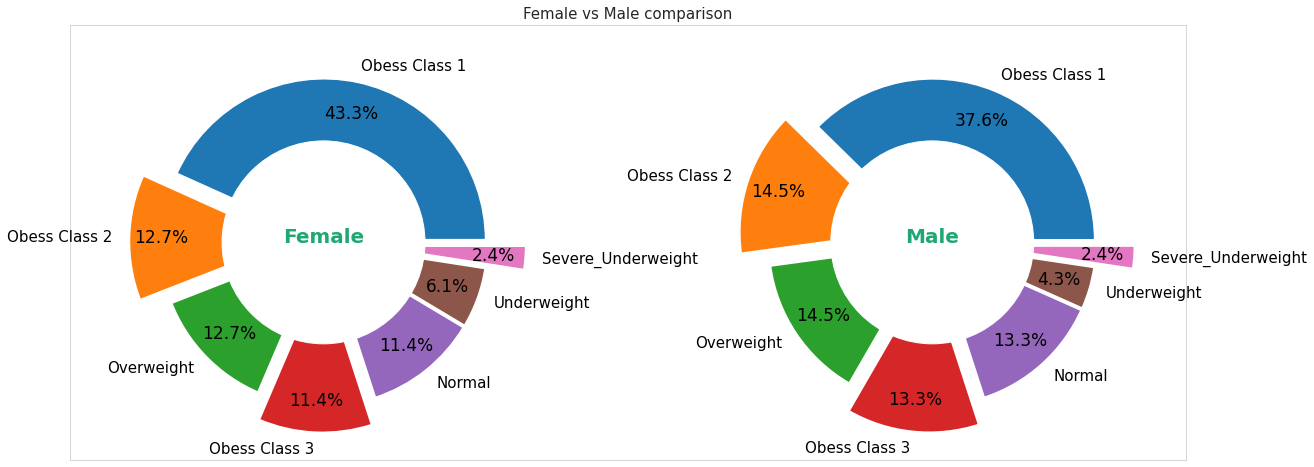

In [85]:
fig = plt.figure(figsize=(20,8))
plt.title("Female vs Male comparison",loc='center',weight=10,size=15)
plt.xticks([])
plt.yticks([])

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.16,0.01,0.14,0.01,0.01,0.2)

wedges, texts, autotexts =  ax1.pie(male_status_counts,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Obess Class 1', 'Obess Class 2', 'Overweight', 'Obess Class 3','Normal', 'Underweight', 'Severe_Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.8,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w'}
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.16,0.01,0.14,0.01,0.01,0.2)
wedges2, texts2, autotexts2 =  ax2.pie(female_status_count,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Obess Class 1', 'Obess Class 2', 'Overweight', 'Obess Class 3','Normal', 'Underweight', 'Severe_Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.8,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')